## Bitcoin power consumption calculation based on hash rate
The current <a href='https://blockchain.info/charts/hash-rate'>hash rate</a> is about $15 \cdot 10^6$ TH/s (2017-12-07). Assuming best case scenario with everyone using the most efficient miner <a href='https://shop.bitmain.com/specifications.htm?name=antminer_s9_asic_bitcoin_miner'>Antminer S9</a> at 98 J/TH. Multiplying the two, we get
$$15 \cdot 10^6 \text{ TH/s} \cdot 98 \text{ J/TH} = 1.47 \text{ GJ/s} = 1.47 \text{ GW}$$
Giving us the daily energy consumption $35.28$ GWh as the lowest estimate. Compared to Sweden witch has a yearly consumption of $370$ TWh (<a href='https://energimyndigheten.a-w2m.se/Home.mvc?ResourceId=5693'>energimyndigheten</a>) this is only a small but still noticable fraction. But as we can see from the hashrate this is currently growning exponentialy, and with it the need for energy. So how long until the energy consumption reaches a level of a industriall country?

#### Load Data
We use data downloaded directly from blockchain.info.

In [ ]:
# Update hash rate data
import downloader
try:
    downloader.update_blockchain_info()
except Exception(e):
    print(e)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# Load raw hashrate data over the last two years
# Downloaded from https://blockchain.info/charts/hash-rate
df = pd.read_csv('../data/hash_rate_raw.csv', names=['Date', 'Hashrate'])

In [3]:
# Convert Date column to Datetime
df.Date = pd.to_datetime(df.Date)

# Print info
df.info()
print('\n','>'*40)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 2 columns):
Date        734 non-null datetime64[ns]
Hashrate    734 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


,Date,Hashrate
0,2016-01-06,702293.086157
1,2016-01-07,743604.444166
2,2016-01-08,903685.956452
3,2016-01-09,821063.240434
4,2016-01-10,877866.357696


#### Plot the data
Let's plot the hashrate with normal and logarithmic y-axis. As we can se from the normal plot the hashrate is increasing exponentially in a steady pace. This is better shown in the logarithmic plot where we get a perfectly straight line.

<IPython.core.display.Javascript object>


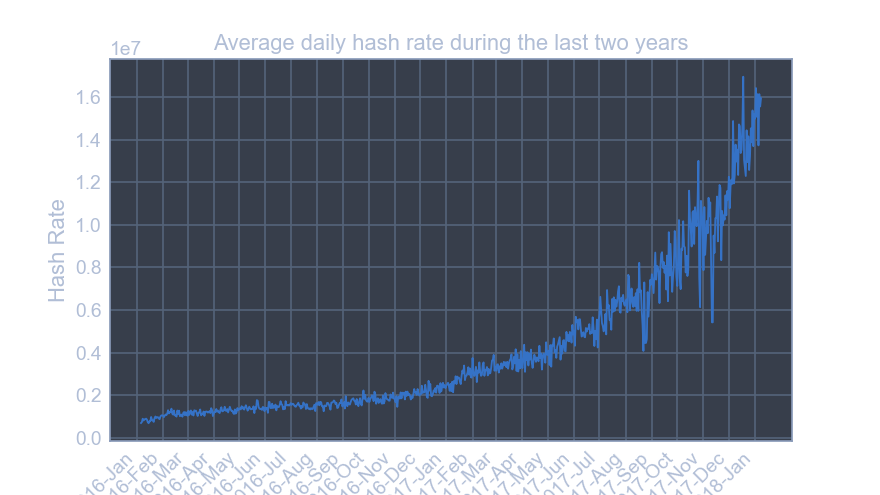

In [4]:
p_df = df[df.Date >= pd.to_datetime('2016')]

# Plot the data
plt.figure(figsize=(8, 4.5))
plt.plot(p_df.Date, p_df.Hashrate)
plt.ylabel('Hash Rate')
plt.xlabel('Date')
plt.title('Average daily hash rate during the last two years')

from matplotlib.dates import DateFormatter
ax = plt.axes()
# Offset: include end month
drange = pd.date_range(min(p_df.Date), max(p_df.Date) + pd.offsets.MonthEnd(), freq='M').strftime('%Y-%m')
# Set xaxis tick on every other month
ax.xaxis.set_ticks(drange)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%b'))

ax.xaxis_date()
ax.autoscale_view()
# ax.set_yscale('linear') # Params: {“linear”, “log”, “symlog”, “logit”}

# 
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<IPython.core.display.Javascript object>


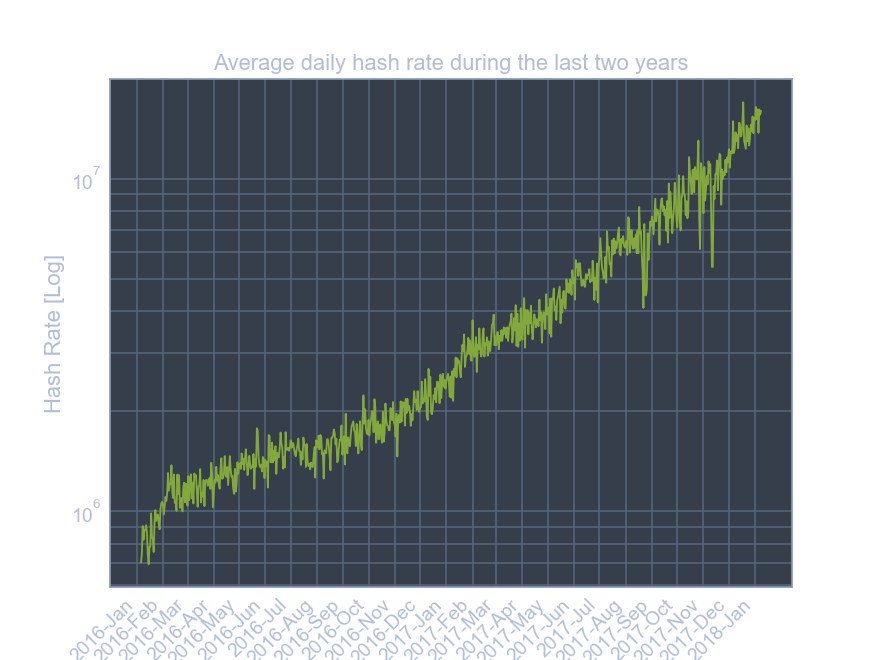

In [5]:
# Logarithmic plot of the data
plt.figure(figsize=(8,6))
plt.plot(p_df.Date, p_df.Hashrate, 'g')
plt.ylabel('Hash Rate [Log]')
plt.xlabel('Date')
plt.title('Average daily hash rate during the last two years')

ax = plt.axes()
# Set xaxis tick on every other month
ax.xaxis.set_ticks(drange)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%b'))

ax.set_yscale('log') # Params: {“linear”, “log”, “symlog”, “logit”}
# Proper way to create ticks as: https://stackoverflow.com/a/44079725/4461051
ax.yaxis.set_major_locator(matplotlib.ticker.LogLocator(subs='all'))

ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [6]:
from datetime import datetime

In [7]:
from scipy.optimize import curve_fit
x = mdates.date2num(df.Date.astype(datetime))
y = df.Hashrate

def func(x, a, b, c):
    return a * np.exp(b*x) + c

ans = curve_fit(func, x, y, p0=[1, 0.0001, min(df.Hashrate)])


NameError: name 'mdates' is not defined

#### Price data analysis

In [ ]:
import re
# Import Bitcoin price data from 2015-12-07 to 2017-12-06
price_df = pd.read_csv('../price/btc.csv', delimiter='\t')
# Set Date data to datetime
price_df.Date = pd.to_datetime(price_df.Date)

# Set Volumen and Market Cap data to int
price_df['Volume'] = price_df['Volume'].apply(lambda x: re.sub(',', '', str(x)))
price_df['Volume'] = pd.to_numeric(price_df['Volume'], errors='coerce')
price_df['Market Cap'] = price_df['Market Cap'].apply(lambda x: re.sub(',', '', str(x)))
price_df['Market Cap'] = pd.to_numeric(price_df['Market Cap'])

# Reverse order of price_df to correct chronological order
price_df = price_df[::-1]
price_df.tail()

In [ ]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.ticker import StrMethodFormatter

price_plt_df = price_df.drop(['Market Cap'], axis=1)
price_plt_df.Date = price_plt_df.Date.apply(matplotlib.dates.date2num)

fig, ax = plt.subplots(figsize=(8,4))
candlestick_ohlc(ax, price_plt_df.values, colorup='g', colordown='r')

# Format Y-axis as dollars
fmt = StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(fmt)

# Format X-axis as date and set ticks at every month
ax.xaxis_date()
drange = pd.date_range(min(price_df.Date), max(price_df.Date) + 2*pd.offsets.MonthEnd(), freq='M').strftime('%Y-%m')
plt.xticks(drange)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%b'))
#ax.autoscale_view()

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#ax.xaxis_date()